# Centralni granični teorem

In [2]:
import numpy as np; from numpy import *
import numpy.random as rnd;
import matplotlib.pyplot as plt
import ipywidgets as widgets; from ipywidgets import *

In [3]:
def clt(N1):
    N = 100000 # Veličina populacije
    #N1 = 2 # Veličina slučajnog uzorka
    rv_x = rnd.uniform(size=N) # Populacija

    N_uzoraka = int(N / N1)

    # Niz koji će sadržavati srednje vrijednosti svakog uzorka
    means = empty(N_uzoraka);
    rv_mean = rv_x.mean()

    rnd_pop = rnd.choice(range(N), N, replace=False)

    for i in range(N_uzoraka):
        means[i] = rv_x[rnd_pop[i*N1:min((i+1)*N1, N)]].mean()

    print(rv_mean, means.mean())

    plt.hist(rv_x, bins=40, density=True, label='X')
    plt.hist(means, bins=40, density=True, label='Means')
    plt.plot([rv_mean, rv_mean], [0, 2])
    plt.legend()
    plt.show()
interact(clt, N1=IntSlider(10, min=1, max=100));

interactive(children=(IntSlider(value=10, description='N1', min=1), Output()), _dom_classes=('widget-interact'…

In [4]:
interact(clt, N1=IntSlider(min=1000, max=10000));

interactive(children=(IntSlider(value=1000, description='N1', max=10000, min=1000), Output()), _dom_classes=('…

In [6]:
## Osobina konvolucije (TODO name)

In [8]:
"""TODO doc"""
def konvolucija(N, tip='rect'):
    # TODO N je Broj konvolucija signala sa samim sobom
    
    # Generisanje signala
    if tip == 'rect':
        x = pad(ones(50), (25,25))
    elif tip == 'noisy_rect':
        x = pad(rnd.uniform(0,1,50), (25,25))
    elif tip == 'exp':
        x = pad(exp(-0.1*array(range(50))), (25,25))

    # Prikaz ulazne sekvence
    plt.subplot(2,1,1)
    plt.plot(x)

    # Sekvenca se konvoluira sa samom sobom N puta
    for i in range(N):
        x = convolve(x, x)
        
    # Normalizacija konvolucije
    x = x / sum(x)
    
    # Određivanje parametara aproksimacije
    n = array(range(len(x)))
    mi = sum(n * x)
    sigma = sqrt(sum((n-mi)**2 * x))
    
    approx = exp(-((n-mi) / sigma)**2 / 2) / (sigma * sqrt(2*pi))

    plt.subplot(2,1,2)
    plt.plot(x, label='Konvolucija');
    plt.plot(approx, label='Aproksimacija')
    plt.legend(); plt.show()
    
interact(konvolucija, N=IntSlider(1, min=1, max=8),
         tip=['rect', 'noisy_rect', 'exp']);

interactive(children=(IntSlider(value=1, description='N', max=8, min=1), Dropdown(description='tip', options=(…

In [10]:
## Obojeno uzorkovanje

In [19]:
def uzorkovanje(N1, Ng, oboji=True, randomiziraj=True, pojedinacni_pdf=True, pdf=False):
    # Ng - broj grupa
    # N1 - broj uzoraka u jednoj grupi

    N = N1 * Ng # ukupan broj uzoraka
    x = rnd.rayleigh(0.3, size=N) # generisanje normalno raspodijeljene populacije

    # Svaki red predstavlja jednu grupu uzoraka
    if randomiziraj:
        indeksi_uzoraka = rnd.permutation(range(N))
    else:
        indeksi_uzoraka = array(range(N))
        
    # Izdvajanje grupa uzoraka
    uzorci = x[indeksi_uzoraka].reshape(Ng, N1)
    indeksi_uzoraka = indeksi_uzoraka.reshape(Ng, N1)
    
    # Crtanje populacije (različitim bojama ili sve u istoj boji)
    plt.subplot(3,1,1)
    if oboji:
        for i in range(Ng):
            plt.scatter(indeksi_uzoraka[i], uzorci[i])
    else:
        plt.scatter(range(N), x)

    i = 2 # indeks subplot-a [*] 

    if pojedinacni_pdf:
        plt.subplot(3,1,2)
        i = i + 1 # [*] koristi se ovdje
        if oboji:
            for i in range(Ng):
                plt.hist(uzorci[i], density=True, rwidth=0.25)
        else:
            plt.hist(x, bins=30)
        
    # Crtanje srednjih vrijednosti crtanja uzoraka
    if pdf:
        plt.subplot(3,1,i) # [*] koristi se ovdje
        #TODO rm pdf, edg = histogram(mean(uzorci, axis=1), bins=40, density=True)
        plt.hist(mean(uzorci, axis=1), bins=40, density=True)
        Ex = x.mean() # Očekivana vrijednost od x
        plt.plot([Ex, Ex], list(plt.ylim()), label='Sr.vr. populacije')
        Eu = uzorci.mean() # Srednja vrijednost očekivanih vrijednosti populacije
        print(Eu, Ex)
        plt.plot([Eu, Eu], list(plt.ylim()), label='Sr.vr. oč. vrijednosti uzoraka')
        plt.legend()
        
    plt.show()
    

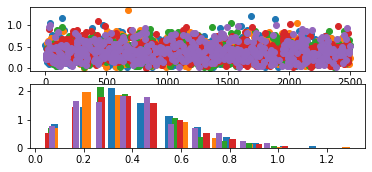

In [17]:
uzorkovanje(500, 5)

In [20]:
interact(uzorkovanje,
         N1=IntSlider(20, 1,1000),
         Ng=IntSlider(500, 1,10000),
         oboji=fixed(False),
         randomiziraj=True,
         pojedinacni_pdf=fixed(False),
         pdf=fixed(True)
        );

interactive(children=(IntSlider(value=20, description='N1', max=1000, min=1), IntSlider(value=500, description…